## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
from pandas_datareader import DataReader

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
#!pip install pandas_datareader

In [4]:
df = DataReader(
    "AAPL",
    'yahoo',
    start=datetime(2017,1,1),
    end=datetime(2018,12,31)
)
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219833
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327639
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632294
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885393


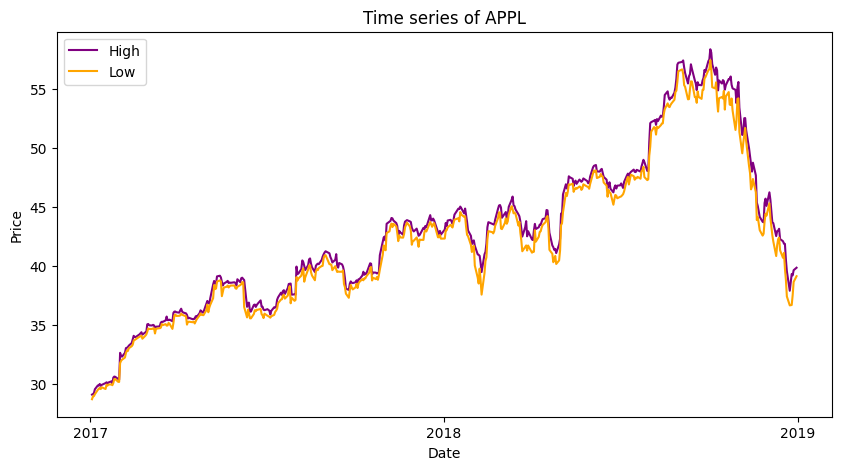

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(df["High"], c='purple', label='High')
ax.plot(df['Low'], c='orange', label='Low')
ax.legend(loc='upper left')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Time series of APPL')

ax.xaxis.set_major_locator(mdates.YearLocator())

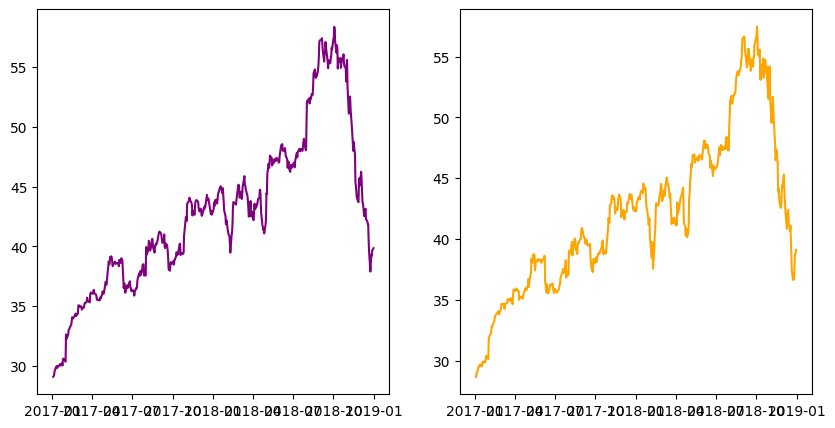

In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(df["High"], c='purple', label='High')
ax2.plot(df['Low'], c='orange', label='Low')
ax.legend(loc='upper left')


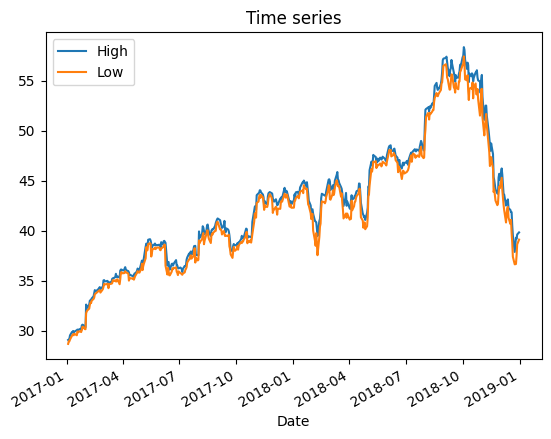

In [7]:
ax = df[["High", "Low"]].plot.line()
ax.set_title("Time series");

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [8]:
df['year'] = df.index.year.astype(str)
df['quarter'] = df.index.quarter.astype(str)
df.head(5)

,High,Low,Open,Close,Volume,Adj Close,year,quarter
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219833,2017,1
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369,2017,1
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327639,2017,1
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632294,2017,1
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885393,2017,1


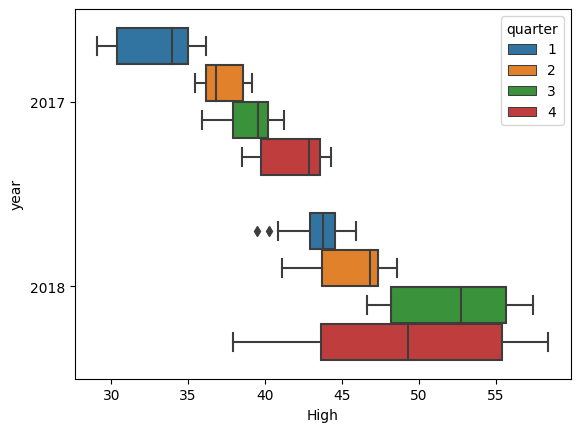

In [9]:
sns.boxplot(
    data=df,
    x='High',
    y='year',
    hue='quarter'
);

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [10]:
pwd

'C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ТОБД22-ПМ20-Материалы к семинарам\\05_visualization'

In [11]:
df = np.load('C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ТОБД22-ПМ20-Материалы к семинарам\\05_visualization\\05_visualization_data\\average_ratings.npy')
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


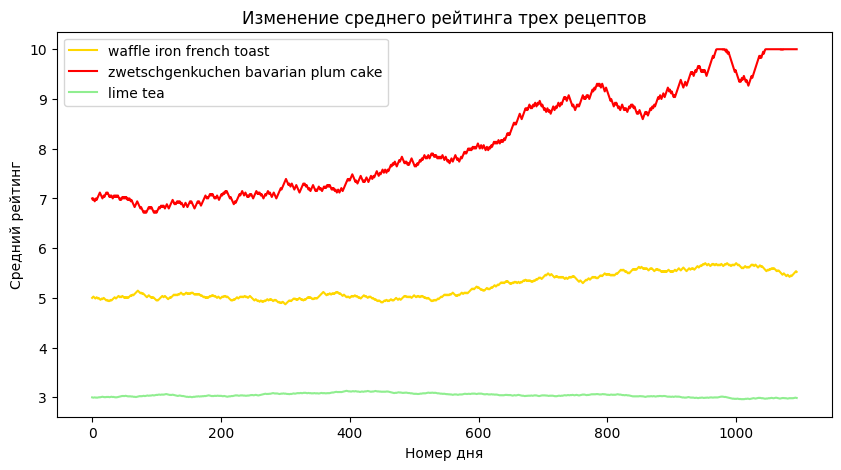

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

# Рисуем сами графики
ax.plot(df.iloc[0], label='waffle iron french toast', color='gold')
ax.plot(df.iloc[1], label='zwetschgenkuchen bavarian plum cake', color='red')
ax.plot(df.iloc[2], label='lime tea', color='lightgreen')

# Добавляем легенды
ax.legend(loc='upper left')

# Подписи
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов');


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [13]:
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)

date_df = pd.date_range(
    start_date,
    end_date
    ).strftime('%d.%m.%Y')

df.columns = pd.to_datetime(date_df, format='%d.%m.%Y')
df

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


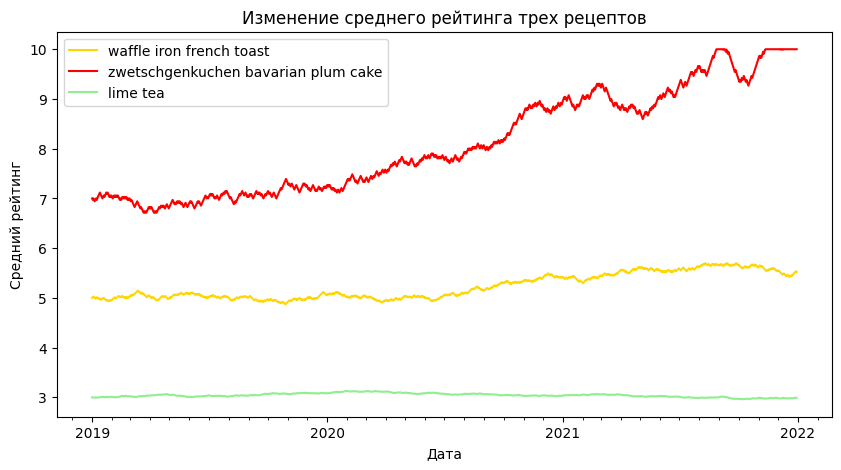

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

# Рисуем сами графики
ax.plot(df.iloc[0], label='waffle iron french toast', color='gold')
ax.plot(df.iloc[1], label='zwetschgenkuchen bavarian plum cake', color='red')
ax.plot(df.iloc[2], label='lime tea', color='lightgreen')
ax.legend(loc='upper left')

# Подписи
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(range(1,13)))) # Засечки по месяцам
ax.xaxis.set_major_locator(mdates.YearLocator()) 

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

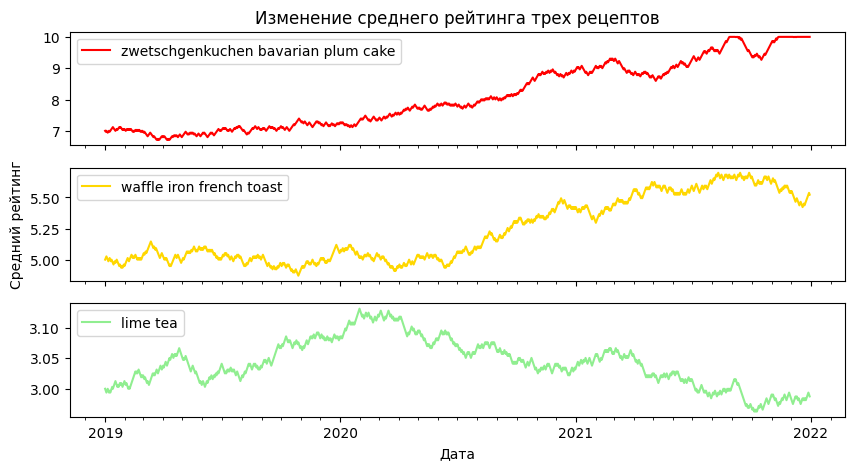

In [15]:
fig, (ax2, ax1, ax3) = plt.subplots(3, 1, figsize=(10,5), sharex=True) # Параметр sharex позволяет сделать общей ось Ох
# Рисуем сами графики
ax1.plot(df.iloc[0], label='waffle iron french toast', color='gold')
ax2.plot(df.iloc[1], label='zwetschgenkuchen bavarian plum cake', color='red')
ax3.plot(df.iloc[2], label='lime tea', color='lightgreen')

# Легенды
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

# Подписи
ax3.set_xlabel('Дата')
ax1.set_ylabel('Средний рейтинг')
ax2.set_title('Изменение среднего рейтинга трех рецептов')

ax3.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(range(1,13)))) # Засечки по месяцам
ax3.xaxis.set_major_locator(mdates.YearLocator()) 


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [16]:
df_v = np.load('C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ТОБД22-ПМ20-Материалы к семинарам\\05_visualization\\05_visualization_data\\visitors.npy')
df_v = pd.DataFrame(df_v, columns=['Count_visitors'])
df_v.head(5)

,Count_visitors
0,2311
1,2023
2,1839
3,1523
4,1371


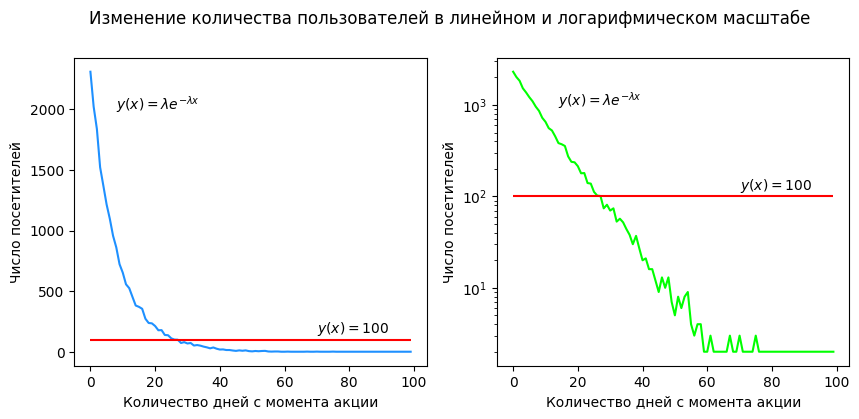

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4)) 

# Рисуем сами графики
ax1.plot(df_v, color='#1E90FF')
ax2.plot(df_v, color='#00FF00')
ax2.set_yscale('log') # Делаем вертикальную ось в логарифмическом масштабе

# На обе картинки добавляем подпись над графиком  
ax1.text(8, 2000, '$y(x)=\lambda e^{-\lambda x}$')
ax2.text(14, 1000, '$y(x)=\lambda e^{-\lambda x}$')

# Добавляем на оба изображения красную горизонтальную линию на уровне y = 100
ax1.hlines(y=100, colors='red', xmin=df_v.index[0], xmax=df_v.index[-1])
ax2.hlines(y=100, colors='red', xmin=df_v.index[0], xmax=df_v.index[-1])

# Добавляем на обе картинки подпись над этой линией с текстом y = 100
ax1.text(70, 160,'$y(x)=100$')
ax2.text(70, 117,'$y(x)=100$')

# Добавляем на оба изображения подписи осей
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')

# Добавляем общий заголовок для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', y=1);

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [18]:
recipes = pd.read_csv('C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ТОБД22-ПМ20-Материалы к семинарам\\02_pandas\\02_pandas_data\\recipes_sample.csv', sep=',',
                      parse_dates=['submitted'])
reviews = pd.read_csv('C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ТОБД22-ПМ20-Материалы к семинарам\\02_pandas\\02_pandas_data\\reviews_sample.csv', sep=',', 
                      parse_dates=['date'], index_col=0)

In [19]:
recipes.head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [20]:
reviews.head(5)

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [21]:
recipes['type'] = np.where(recipes['minutes'] < 5, 'Short', None)
recipes['type'] = np.where((5 <= recipes['minutes']) & (recipes['minutes'] < 50), 'Medium', recipes['type'])
recipes['type'] = np.where(50 <= recipes['minutes'], 'Long', recipes['type'])
recipes.head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Medium
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Medium
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Medium
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Medium


In [22]:
recipes_gr = recipes.groupby('type') \
        .agg({'n_steps':'mean', 'id':'count'}) \
        .rename(columns={'n_steps':'mean_n_steps','id':'count_types'}) 
recipes_gr

,mean_n_steps,count_types
type,,
Long,11.917290,11718
Medium,8.581922,17607
Short,4.990431,675


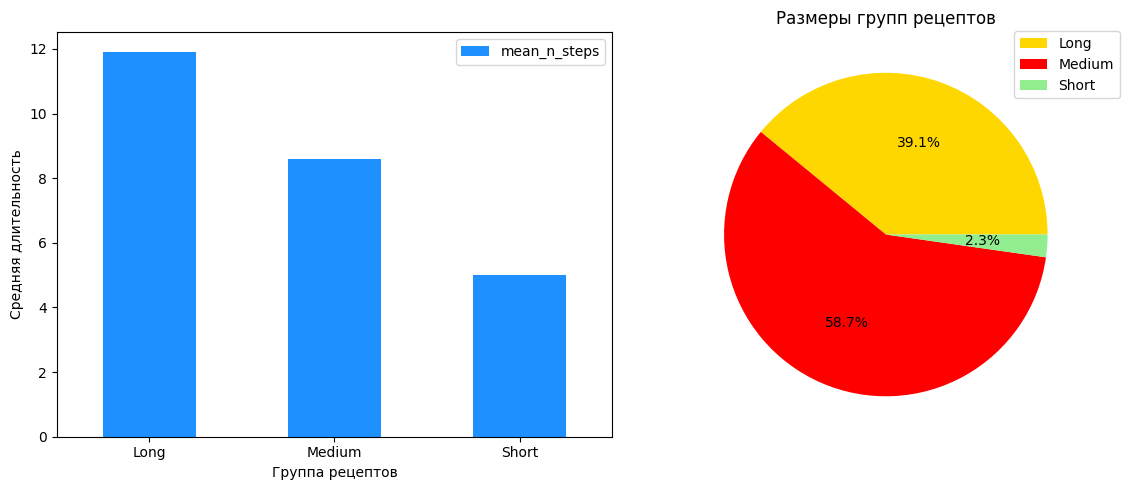

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(4, 6))  
axes = axes.ravel() 

for i, ax in enumerate(axes):
    if i == 0:
        recipes_gr[['mean_n_steps']].plot.bar(figsize=(12,5), ax=ax, color='#1E90FF')
        ax.set_xlabel('Группа рецептов')
        ax.set_ylabel('Средняя длительность')
        labels = recipes_gr.index
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(labels, rotation=360, ha='center', fontsize=10)
    else:
        recipes_gr.plot(y='count_types', kind="pie", colors=['gold','red','lightgreen'],
                        ax=ax, legend=True, title='Размеры групп рецептов', ylabel='', autopct='%1.1f%%', labeldistance=None)
        ax.legend(bbox_to_anchor=(0.8, 1.02), loc='upper left')
            
fig.tight_layout()
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [31]:
rev_df = reviews.query("date.dt.year == 2008 or date.dt.year == 2009")
rev_df['date_year'] = rev_df.date.dt.year
rev_df

,user_id,recipe_id,date,rating,review,date_year
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy...",2008
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...,2008
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...,2008
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days...",2008
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...,2008
...,...,...,...,...,...,...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...,2008
698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...,2009
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau...",2008
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...,2009


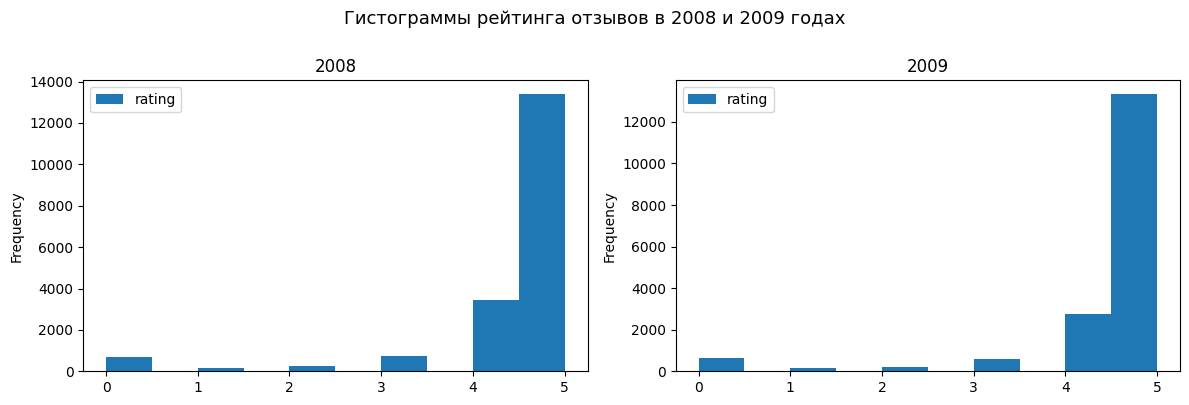

In [25]:
axes = rev_df.plot.hist(column='rating', by='date_year', subplots=True, layout=(1, 2), figsize=(12, 4))
fig = axes[0][0].get_figure() 

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=13, y=1)
fig.tight_layout()
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

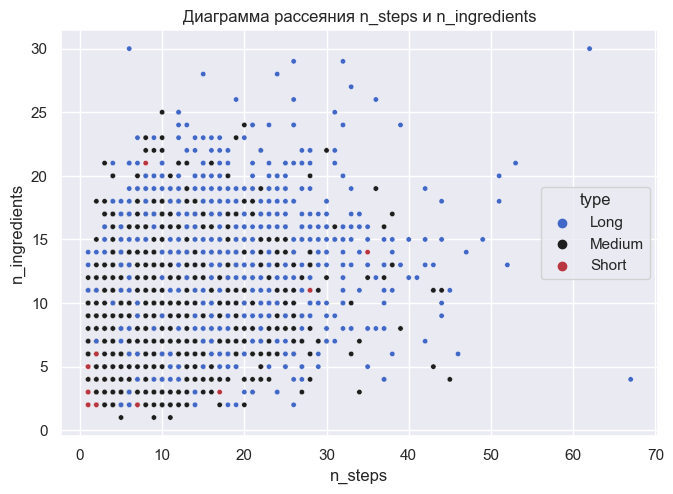

In [26]:
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize':(7.7,5.27)})
sns.scatterplot(data = recipes, x = "n_steps", y = "n_ingredients", hue='type', s=15, palette='icefire')\
                .set_title('Диаграмма рассеяния n_steps и n_ingredients')

plt.show() 

### Между этими двумя переменными линейная зависимость не наблюдается

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [27]:
recipes.head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Medium
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Medium
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Medium
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Medium


In [28]:
reviews.head(5)

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [29]:
new_df = recipes.merge(reviews, left_on='id', right_on='recipe_id')
new_df.drop('recipe_id', axis=1, inplace=True)
new_df.head(2)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type,user_id,date,rating,review
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Long,743566,2008-01-28,5,I lived in San Diego for 19 years and would g...
1,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Long,76503,2003-06-03,5,This soup is the Bomb! Don't hesitate to try.....


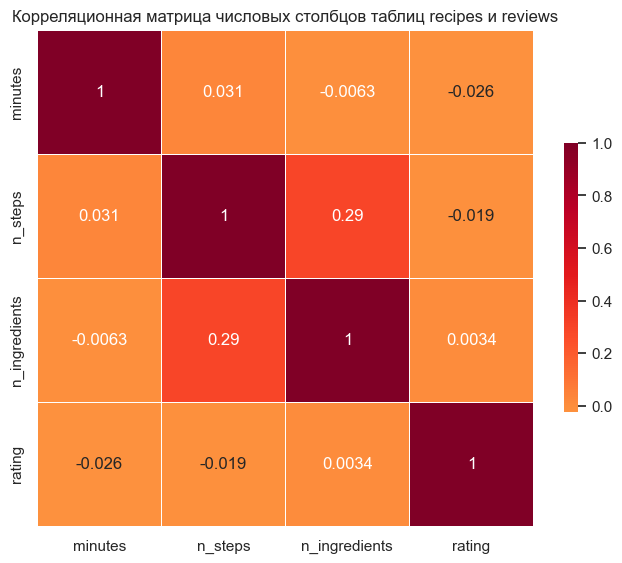

In [30]:
sns.set_theme(style="white")

corr = new_df[["minutes", "n_steps", "n_ingredients", "rating"]].corr()

fig, ax = plt.subplots(figsize=(8, 7))

sns.heatmap(corr, cmap='YlOrRd', center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})\
            .set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');